In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_csv("INF2178_A3_data.csv")
data.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


## Data Preprocessing

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [3]:
data.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200,1.895165
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061,0.822692
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000,1.000000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000,1.000000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,2.000000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000,3.000000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000,3.000000


## Exploratory Data Analysis

In [4]:
data['change_in_reading_score'] = data['springmathscore'] -  data['fallmathscore']
data['change_in_math_score'] = data['springmathscore'] -  data['fallmathscore']


In [5]:
reading_data = data.groupby('incomegroup').agg({'change_in_reading_score': ['mean', 'std', 'size']})
reading_data.columns = ['Mean Reading Change Score', 'Standard Deviation', 'Size']
reading_data.reset_index(inplace=True)
reading_data


,incomegroup,Mean Reading Change Score,Standard Deviation,Size
0,1,9.958547,6.406540,4729
1,2,10.896224,6.853736,3726
2,3,11.399178,7.339003,3478


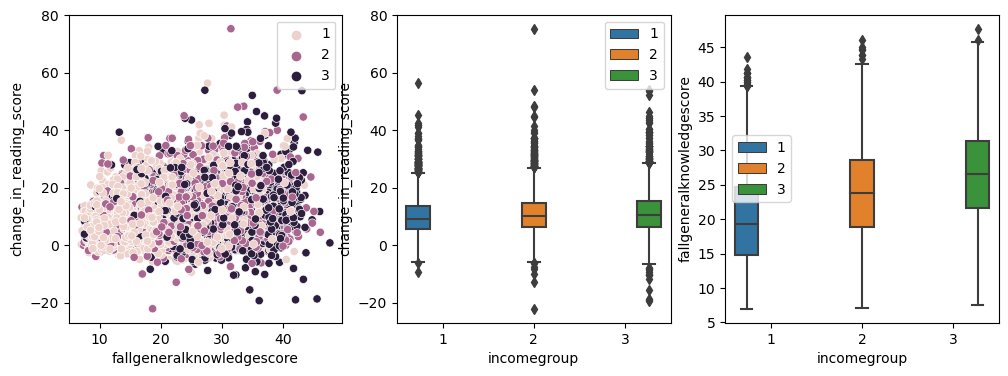

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
sns.scatterplot(data=data, x="fallgeneralknowledgescore", y="change_in_reading_score", hue=data.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=data, x="incomegroup", y="change_in_reading_score", hue=data.incomegroup.tolist(), ax=axs[1])
sns.boxplot(data=data, x="incomegroup", y="fallgeneralknowledgescore", hue=data.incomegroup.tolist(), ax=axs[2])
plt.show()


In [7]:
math_data = data.groupby('incomegroup').agg({'change_in_math_score': ['mean', 'std', 'size']})
math_data.columns = ['Mean Math Change Score', 'Standard Deviation', 'Size']
math_data.reset_index(inplace=True)
math_data

,incomegroup,Mean Math Change Score,Standard Deviation,Size
0,1,9.958547,6.406540,4729
1,2,10.896224,6.853736,3726
2,3,11.399178,7.339003,3478


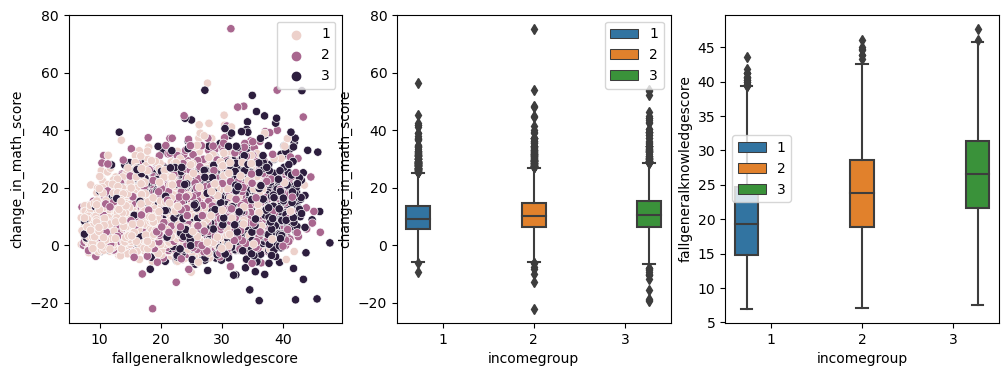

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
sns.scatterplot(data=data, x="fallgeneralknowledgescore", y="change_in_math_score", hue=data.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=data, x="incomegroup", y="change_in_math_score", hue=data.incomegroup.tolist(), ax=axs[1])
sns.boxplot(data=data, x="incomegroup", y="fallgeneralknowledgescore", hue=data.incomegroup.tolist(), ax=axs[2])
plt.show()

## Assumption Test

### Reading Score

In [9]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import levene
from scipy.stats import shapiro



model_reading = ols('change_in_reading_score ~ incomegroup + fallgeneralknowledgescore', data=data).fit()

# Perform Levene test for reading scores
levene_test_reading = levene(data[data['incomegroup'] == 1]['change_in_reading_score'],
                             data[data['incomegroup'] == 2]['change_in_reading_score'],
                             data[data['incomegroup'] == 3]['change_in_reading_score'])

print("\nLevene test for reading scores:")
print(levene_test_reading)


# Assumption test for Homogeneity of regression slopes
model = ols('change_in_reading_score ~ C(incomegroup) * fallgeneralknowledgescore', data=data).fit()
summary = model.summary()
print(summary)

# Shapiro-Wilk test for reading scores
shapiro_test_reading = shapiro(model_reading.resid)
print("\nShapiro-Wilk test for reading scores:")
print(shapiro_test_reading)



Levene test for reading scores:
LeveneResult(statistic=22.215180179067378, pvalue=2.344180384098772e-10)
                               OLS Regression Results                              
Dep. Variable:     change_in_reading_score   R-squared:                       0.050
Model:                                 OLS   Adj. R-squared:                  0.049
Method:                      Least Squares   F-statistic:                     124.4
Date:                     Fri, 22 Mar 2024   Prob (F-statistic):          7.91e-129
Time:                             19:31:09   Log-Likelihood:                -39600.
No. Observations:                    11933   AIC:                         7.921e+04
Df Residuals:                        11927   BIC:                         7.926e+04
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                                                    co

/Users/anthonyh/miniforge3/envs/cpsc330/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Math Score

In [10]:
# Assumption test for Homogeneity of regression slopes
model = ols('change_in_math_score ~ C(incomegroup) * fallgeneralknowledgescore', data=data).fit()
summary = model.summary()
print(summary)


# Perform Levene test for math scores
levene_test_math = levene(data[data['incomegroup'] == 1]['change_in_math_score'],
                          data[data['incomegroup'] == 2]['change_in_math_score'],
                          data[data['incomegroup'] == 3]['change_in_math_score'])


print("Levene test for math scores:")
print(levene_test_math)


# Shapiro-Wilk test for math scores
model_math = ols('change_in_math_score ~ incomegroup + fallgeneralknowledgescore', data=data).fit()
shapiro_test_math = shapiro(model_math.resid)
print("Shapiro-Wilk test for math scores:")
print(shapiro_test_math)



                             OLS Regression Results                             
Dep. Variable:     change_in_math_score   R-squared:                       0.050
Model:                              OLS   Adj. R-squared:                  0.049
Method:                   Least Squares   F-statistic:                     124.4
Date:                  Fri, 22 Mar 2024   Prob (F-statistic):          7.91e-129
Time:                          19:31:09   Log-Likelihood:                -39600.
No. Observations:                 11933   AIC:                         7.921e+04
Df Residuals:                     11927   BIC:                         7.926e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

/Users/anthonyh/miniforge3/envs/cpsc330/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Performing ANCOVA

In [11]:
%pip install pingouin
from pingouin import ancova
# ANCOVA for reading scores
ancova(data=data, dv='change_in_reading_score', covar='fallgeneralknowledgescore', between='incomegroup')

Note: you may need to restart the kernel to use updated packages.


,Source,SS,DF,F,p-unc,np2
0,incomegroup,55.879616,2,0.624286,5.356614e-01,0.000105
1,fallgeneralknowledgescore,22425.932956,1,501.083959,9.425259e-109,0.040312
2,Residual,533880.499781,11929,NaN,NaN,NaN


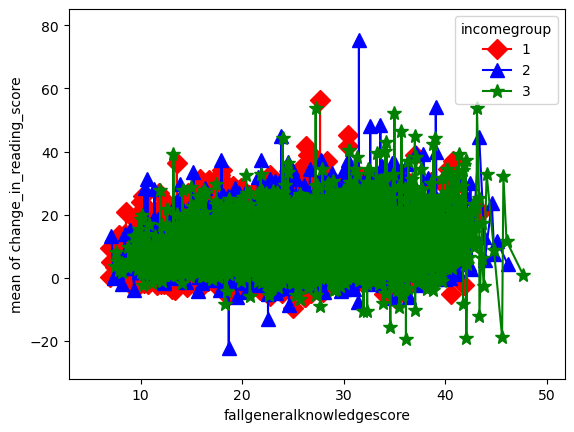

In [12]:
# interaction plot for reading scores
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(data['fallgeneralknowledgescore'], data['incomegroup'], data['change_in_reading_score'],
                       colors=['red', 'blue', 'green'], markers=['D', '^', '*'], ms=10)

plt.show()

In [13]:
# ANCOVA for math scores
ancova(data=data, dv='change_in_math_score', covar='fallgeneralknowledgescore', between='incomegroup')


,Source,SS,DF,F,p-unc,np2
0,incomegroup,55.879616,2,0.624286,5.356614e-01,0.000105
1,fallgeneralknowledgescore,22425.932956,1,501.083959,9.425259e-109,0.040312
2,Residual,533880.499781,11929,NaN,NaN,NaN


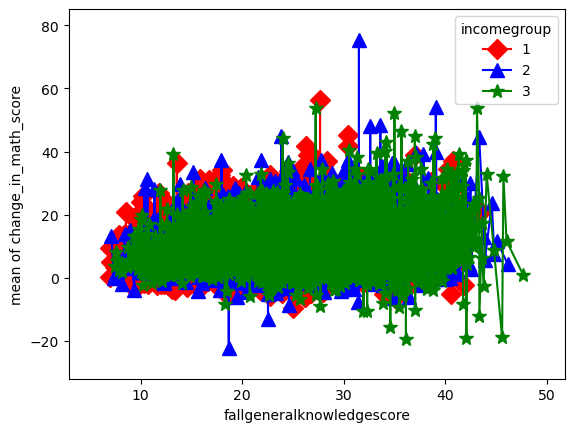

In [14]:
# interaction plot for math scores
fig = interaction_plot(data['fallgeneralknowledgescore'], data['incomegroup'], data['change_in_math_score'],
                       colors=['red', 'blue', 'green'], markers=['D', '^', '*'], ms=10)

plt.show()